In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, NMF, MiniBatchSparsePCA, TruncatedSVD
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()

In [2]:
df = pd.read_pickle('FT-data-DSpace/data_processed.pickle')
df

,ID,Date,Meeting Number,Agenda Name,Agenda Number,File Type,File Number,File Step,Speaker Name,Speaker Role,Speaker Start,Speaker End,Speech
0,CBAEA326-B201-41AB-A756-029BA1F58D82,2009-10-30T10:00:00,9. møde,[None],0,Formandens meddelelser,,,None,formand,2009-10-30T10:00:18.063,2009-10-30T10:01:04.997,Mødet er åbnet.I dag er der følgende anmeldels...
1,CBAEA326-B201-41AB-A756-029BA1F58D82,2009-10-30T10:00:00,9. møde,[None],0,Formandens meddelelser,,,Mogens Lykketoft,formand,2009-10-30T11:32:26.200,2009-10-30T11:33:02.087,Der er ikke mere at foretage i dette møde.Folk...
2,CBAEA326-B201-41AB-A756-029BA1F58D82,2009-10-30T10:00:00,9. møde,"[1) 1. behandling af lovforslag nr. L 43:, For...",1,Lovforslag,43,BEH1,None,formand,2009-10-30T10:01:04.997,2009-10-30T10:01:18.080,"Forhandlingen er åbnet, og den første, der får..."
3,CBAEA326-B201-41AB-A756-029BA1F58D82,2009-10-30T10:00:00,9. møde,"[1) 1. behandling af lovforslag nr. L 43:, For...",1,Lovforslag,43,BEH1,Peter Juel Jensen,medlem,2009-10-30T10:01:18.080,2009-10-30T10:02:53.290,Jeg holder ordførertalen for Venstre og på veg...
4,CBAEA326-B201-41AB-A756-029BA1F58D82,2009-10-30T10:00:00,9. møde,"[1) 1. behandling af lovforslag nr. L 43:, For...",1,Lovforslag,43,BEH1,None,formand,2009-10-30T10:02:53.290,2009-10-30T10:03:07.543,Tak til hr. Peter Juel Jensen. Der er ikke øns...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380878,32C635C1-1390-4EAE-B101-FEF04C87F352,2017-01-26T10:00:00,50. møde,[10) 1. behandling af beslutningsforslag nr. B...,10,Beslutningsforslag,56,BEH1,Anders Samuelsen,minister,2017-01-26T16:10:37.993,2017-01-26T16:11:10.913,"Jeg kan ikke sætte procentsatser på, hvad man ..."
380879,32C635C1-1390-4EAE-B101-FEF04C87F352,2017-01-26T10:00:00,50. møde,[10) 1. behandling af beslutningsforslag nr. B...,10,Beslutningsforslag,56,BEH1,Henrik Dam Kristensen,formand,2017-01-26T16:11:10.913,2017-01-26T16:11:15.057,Hr. René Gade.
380880,32C635C1-1390-4EAE-B101-FEF04C87F352,2017-01-26T10:00:00,50. møde,[10) 1. behandling af beslutningsforslag nr. B...,10,Beslutningsforslag,56,BEH1,René Gade,medlem,2017-01-26T16:11:15.057,2017-01-26T16:11:21.597,"Tak for svaret, men jeg mente egentlig mere i ..."
380881,32C635C1-1390-4EAE-B101-FEF04C87F352,2017-01-26T10:00:00,50. møde,[10) 1. behandling af beslutningsforslag nr. B...,10,Beslutningsforslag,56,BEH1,Anders Samuelsen,minister,2017-01-26T16:11:21.597,2017-01-26T16:11:24.373,Det synes jeg lyder fornuftigt.


In [3]:
df = df[['Date', 'Speaker Name', 'Speaker Role']]
df['Date'] = pd.to_datetime(df['Date'])
df

C:\Users\AmaliaVogiatzi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Speaker Name,Speaker Role
0,2009-10-30 10:00:00,None,formand
1,2009-10-30 10:00:00,Mogens Lykketoft,formand
2,2009-10-30 10:00:00,None,formand
3,2009-10-30 10:00:00,Peter Juel Jensen,medlem
4,2009-10-30 10:00:00,None,formand
...,...,...,...
380878,2017-01-26 10:00:00,Anders Samuelsen,minister
380879,2017-01-26 10:00:00,Henrik Dam Kristensen,formand
380880,2017-01-26 10:00:00,René Gade,medlem
380881,2017-01-26 10:00:00,Anders Samuelsen,minister


In [4]:
df = df.dropna()
df

,Date,Speaker Name,Speaker Role
1,2009-10-30 10:00:00,Mogens Lykketoft,formand
3,2009-10-30 10:00:00,Peter Juel Jensen,medlem
5,2009-10-30 10:00:00,Niels Sindal,medlem
7,2009-10-30 10:00:00,Henrik Brodersen,medlem
9,2009-10-30 10:00:00,Høgni Hoydal,medlem
...,...,...,...
380878,2017-01-26 10:00:00,Anders Samuelsen,minister
380879,2017-01-26 10:00:00,Henrik Dam Kristensen,formand
380880,2017-01-26 10:00:00,René Gade,medlem
380881,2017-01-26 10:00:00,Anders Samuelsen,minister


In [5]:
tvec = TfidfVectorizer(analyzer='word', ngram_range=(1,2), max_features=10000)
x = tvec.fit_transform(df['Speaker Name'])

words = tvec.get_feature_names()

In [6]:
df_x = pd.DataFrame(columns= words, data=x.toarray())
df_x['Date'] = df['Date']
df_x['Year'] = df_x['Date'].dt.year
df_x['Speaker Role'] = df['Speaker Role']
# df_x = df_x.dropna()
df_x.sample(2)

,aaen,aaja,aaja chemnitz,aamund,aastrup,aastrup jensen,abildgaard,adam,adam møller,adelsteen,...,özlem,özlem sara,øktem,ørum,ørum jørgensen,østerby,østergaard,Date,Year,Speaker Role
74821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-11-23 13:00:00,2010.0,medlem
284556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-03-29 13:00:00,2016.0,formand


# PCA

Performing dimensionality reduction using LSA
done in 339.095900s


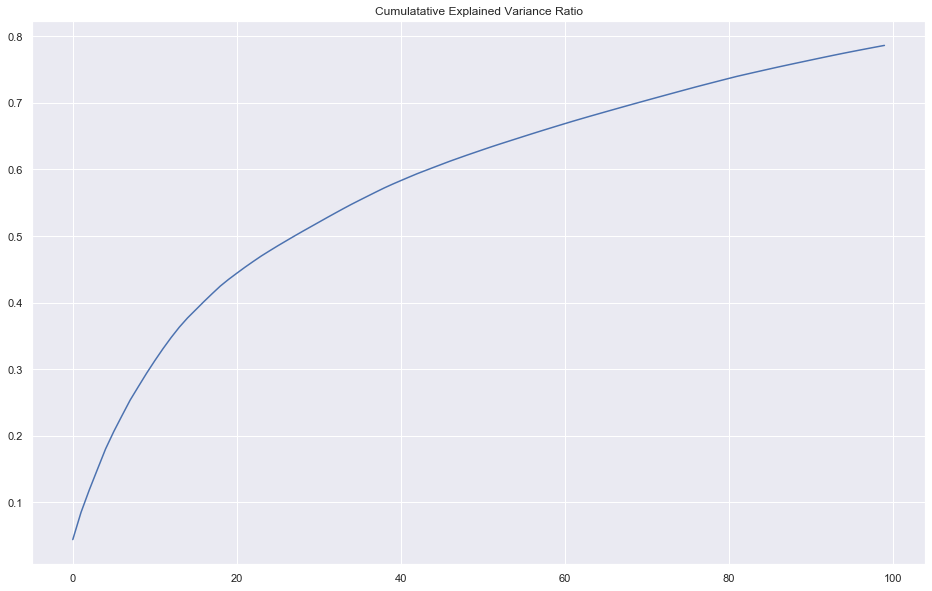

In [7]:
print("Performing dimensionality reduction using LSA")
t0 = time.time()
# Vectorizer results are normalized, which makes KMeans behave as
# spherical k-means for better results. Since LSA/SVD results are
# not normalized, we have to redo the normalization.
svd = TruncatedSVD(n_components=100, n_iter=100)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

pca_result = lsa.fit_transform(df_x[words])
df_x['pca-one'] = pca_result[:,0]
df_x['pca-two'] = pca_result[:,1] 
df_x['pca-three'] = pca_result[:,2]#

print("done in %fs" % (time.time() - t0))
plt.figure(figsize=(16,10))
plt.title('Cumulatative Explained Variance Ratio')
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.show()

In [8]:
k = 5
#kmeans = KMeans(n_clusters=3).fit(df_x[words])
kmeans = KMeans(n_clusters=k).fit(pca_result)
df_x['label'] = kmeans.labels_

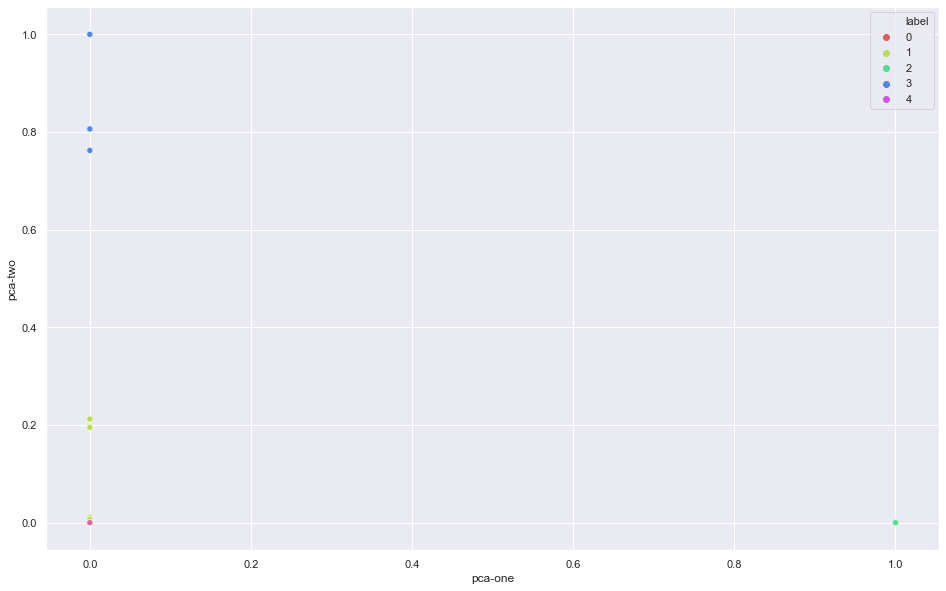

In [9]:
plt.figure(figsize=(16,10))
sns.scatterplot( x="pca-one", y="pca-two", hue='label', palette=sns.color_palette("hls", k), data=df_x, legend="full", alpha=0.3)

# T-SNE

In [11]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=35, n_iter=250)
#tsne_results = tsne.fit_transform(df_x[words])
tsne_results = tsne.fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 315376 samples in 26.106s...
[t-SNE] Computed neighbors for 315376 samples in 426.151s...
[t-SNE] Computed conditional probabilities for sample 1000 / 315376
[t-SNE] Computed conditional probabilities for sample 2000 / 315376
[t-SNE] Computed conditional probabilities for sample 3000 / 315376
[t-SNE] Computed conditional probabilities for sample 4000 / 315376
[t-SNE] Computed conditional probabilities for sample 5000 / 315376
[t-SNE] Computed conditional probabilities for sample 6000 / 315376
[t-SNE] Computed conditional probabilities for sample 7000 / 315376
[t-SNE] Computed conditional probabilities for sample 8000 / 315376
[t-SNE] Computed conditional probabilities for sample 9000 / 315376
[t-SNE] Computed conditional probabilities for sample 10000 / 315376
[t-SNE] Computed conditional probabilities for sample 11000 / 315376
[t-SNE] Computed conditional probabilities for sample 12000 / 315376
[t-SNE] Computed conditional pro

[t-SNE] Computed conditional probabilities for sample 118000 / 315376
[t-SNE] Computed conditional probabilities for sample 119000 / 315376
[t-SNE] Computed conditional probabilities for sample 120000 / 315376
[t-SNE] Computed conditional probabilities for sample 121000 / 315376
[t-SNE] Computed conditional probabilities for sample 122000 / 315376
[t-SNE] Computed conditional probabilities for sample 123000 / 315376
[t-SNE] Computed conditional probabilities for sample 124000 / 315376
[t-SNE] Computed conditional probabilities for sample 125000 / 315376
[t-SNE] Computed conditional probabilities for sample 126000 / 315376
[t-SNE] Computed conditional probabilities for sample 127000 / 315376
[t-SNE] Computed conditional probabilities for sample 128000 / 315376
[t-SNE] Computed conditional probabilities for sample 129000 / 315376
[t-SNE] Computed conditional probabilities for sample 130000 / 315376
[t-SNE] Computed conditional probabilities for sample 131000 / 315376
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 242000 / 315376
[t-SNE] Computed conditional probabilities for sample 243000 / 315376
[t-SNE] Computed conditional probabilities for sample 244000 / 315376
[t-SNE] Computed conditional probabilities for sample 245000 / 315376
[t-SNE] Computed conditional probabilities for sample 246000 / 315376
[t-SNE] Computed conditional probabilities for sample 247000 / 315376
[t-SNE] Computed conditional probabilities for sample 248000 / 315376
[t-SNE] Computed conditional probabilities for sample 249000 / 315376
[t-SNE] Computed conditional probabilities for sample 250000 / 315376
[t-SNE] Computed conditional probabilities for sample 251000 / 315376
[t-SNE] Computed conditional probabilities for sample 252000 / 315376
[t-SNE] Computed conditional probabilities for sample 253000 / 315376
[t-SNE] Computed conditional probabilities for sample 254000 / 315376
[t-SNE] Computed conditional probabilities for sample 255000 / 315376
[t-SNE] Computed con

In [12]:
df_x['tsne_component_one'] = tsne_results[:,0]
df_x['tsne_component_two'] = tsne_results[:,1]

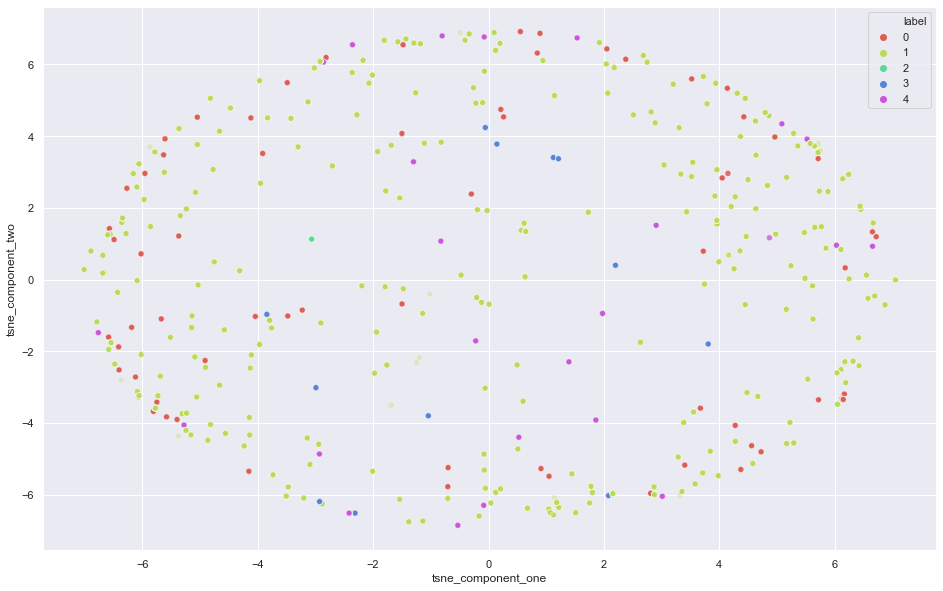

In [13]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne_component_one", y="tsne_component_two",
    hue='label',
    palette=sns.color_palette("hls", k),
    data=df_x,
    legend="full",
    alpha=0.3
)

In [14]:
df_x

,aaen,aaja,aaja chemnitz,aamund,aastrup,aastrup jensen,abildgaard,adam,adam møller,adelsteen,...,østergaard,Date,Year,Speaker Role,pca-one,pca-two,pca-three,label,tsne_component_one,tsne_component_two
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaT,NaN,NaN,-6.919095e-16,1.271389e-07,7.550018e-09,3,-2.990659,-3.015327
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2009-10-30 10:00:00,2009.0,formand,-1.290446e-17,5.342067e-06,2.102533e-05,0,-3.227718,-0.852770
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaT,NaN,NaN,5.159800e-21,3.398853e-11,1.268956e-11,1,-2.172964,6.115842
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2009-10-30 10:00:00,2009.0,medlem,-8.530912e-18,1.302267e-08,3.962998e-05,4,-0.072442,6.768312
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaT,NaN,NaN,4.261208e-19,1.190748e-16,-5.441955e-17,1,-2.905837,-1.211606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2016-02-25 10:00:00,2016.0,formand,1.645965e-14,6.142282e-12,-2.685406e-12,0,-3.487513,5.492332
315372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2016-02-25 10:00:00,2016.0,formand,-7.703932e-18,2.099225e-08,1.835900e-05,4,-0.223874,-1.711010
315373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2016-02-25 10:00:00,2016.0,formand,2.587150e-19,3.048484e-11,9.418280e-04,1,3.539499,3.272894
315374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2016-02-25 10:00:00,2016.0,formand,1.645965e-14,6.142282e-12,-2.685406e-12,0,-3.487514,5.492332


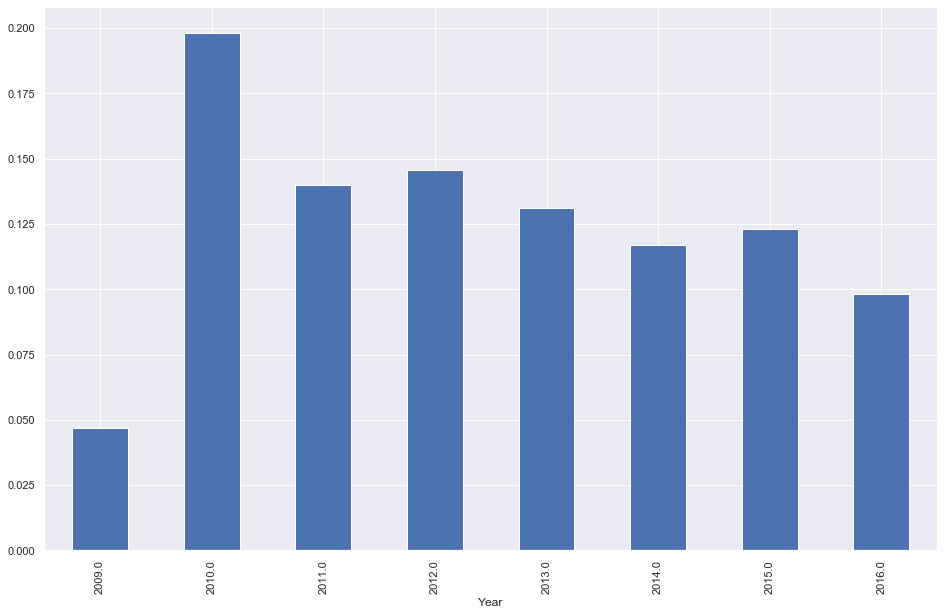

In [19]:
plt.figure(figsize=(16,10))
df_ = df_x.groupby(['Year'])['Speaker Role'].count()
df_ = df_.div(df_.sum(),axis=0).plot(kind='bar',  figsize=(16,10))
plt.show()

In [20]:
original_space_centroids = svd.inverse_transform(kmeans.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]

In [21]:
terms = tvec.get_feature_names()
for i in range(k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: christensen peter christensen peter hersom camilla hersom camilla poulsen villum villum christensen søren
Cluster 1: mette lene espersen lene pia bock mette bock rené kjærsgaard pia kjærsgaard jensen
Cluster 2: haarder bertel haarder bertel klint karen klint karen kristian per per clausen clausen
Cluster 3: holger nielsen holger nielsen juhl christian juhl christian bent bøgsted bøgsted bent mogens lykketoft
Cluster 4: søren søren espersen espersen karen klint klint karen henrik dam dam kristensen dam kristensen
